First 5 rows of the dataset:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865              3                  2                       0   
1             55054            109                  1                       1   
2             55055             52                  1                       1   
3             46236             34                  1                       1   
4             54863              3                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                            6                            6   
2                            6                            6   
3                            6                            6   
4                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6      

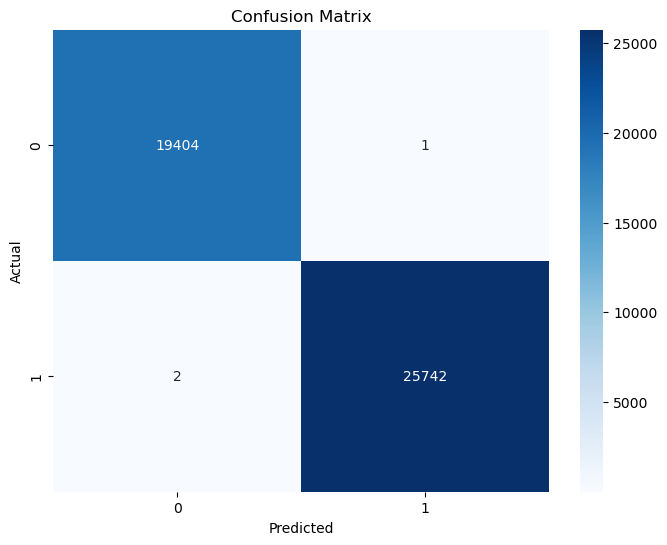


Model saved as 'ids_model.pkl'.

Model loaded successfully!


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


df = pd.read_csv("data2.csv")


df.columns = df.columns.str.strip()


df.replace([np.inf, -np.inf], np.nan, inplace=True)


df.fillna(df.median(numeric_only=True), inplace=True)

print("First 5 rows of the dataset:")
print(df.head())


df['Label'] = df['Label'].astype('category').cat.codes  

X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target (attack or normal)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining the Machine Learning model...")


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


joblib.dump(clf, "ids_model.pkl")
print("\nModel saved as 'ids_model.pkl'.")

joblib.dump(scaler, "scaler.pkl")


clf_loaded = joblib.load("ids_model.pkl")
print("\nModel loaded successfully!")


In [10]:
y_pred = clf.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))



Model Accuracy: 99.99%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19405
           1       1.00      1.00      1.00     25744

    accuracy                           1.00     45149
   macro avg       1.00      1.00      1.00     45149
weighted avg       1.00      1.00      1.00     45149

